In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xg 
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from matplotlib import rcParams
from cycler import cycler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold

In [45]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [46]:
df = pd.read_csv('drive/My Drive/AIRGAS/Superstore3.csv')

In [47]:
df = df.drop("Unnamed: 0" , axis = 1)
df = df.drop('Row_ID', axis = 1)
df = df.drop("Ship_Date", axis =1)

In [48]:
df

,Order_ID,Order_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,...,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Day,Month,Year
0,4521,2014-01-03,3,145,110,0,0,121,36,77095,...,1,4,93,16.448,2,0.2,5.5512,3,1,2014
1,680,2014-01-04,3,563,570,2,0,248,3,60540,...,1,2,982,11.784,3,0.2,4.2717,4,1,2014
2,680,2014-01-04,3,563,570,2,0,248,3,60540,...,1,6,407,272.736,3,0.2,-64.7748,4,1,2014
3,680,2014-01-04,3,563,570,2,0,248,3,60540,...,1,10,1527,3.540,2,0.8,-5.4870,4,1,2014
4,4468,2014-01-05,3,429,487,0,0,306,30,19143,...,1,9,1019,19.536,3,0.2,4.8840,5,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,3255,2017-12-30,3,326,302,0,0,188,34,80538,...,1,15,1055,3.024,3,0.2,-0.6048,30,12,2017
9990,2961,2017-12-30,3,561,544,0,0,256,24,10009,...,1,10,712,52.776,3,0.2,19.7910,30,12,2017
9991,2961,2017-12-30,3,561,544,0,0,256,24,10009,...,2,5,1553,90.930,7,0.0,2.7279,30,12,2017
9992,2332,2017-12-30,3,170,183,1,0,54,23,94533,...,1,10,1200,13.904,2,0.2,4.5188,30,12,2017


In [49]:
df.set_index('Order_Date')

,Order_ID,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,...,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Day,Month,Year
Order_Date,,,,,,,,,,,,,,,,,,,,,
2014-01-03,4521,3,145,110,0,0,121,36,77095,0,...,1,4,93,16.448,2,0.2,5.5512,3,1,2014
2014-01-04,680,3,563,570,2,0,248,3,60540,0,...,1,2,982,11.784,3,0.2,4.2717,4,1,2014
2014-01-04,680,3,563,570,2,0,248,3,60540,0,...,1,6,407,272.736,3,0.2,-64.7748,4,1,2014
2014-01-04,680,3,563,570,2,0,248,3,60540,0,...,1,10,1527,3.540,2,0.8,-5.4870,4,1,2014
2014-01-05,4468,3,429,487,0,0,306,30,19143,1,...,1,9,1019,19.536,3,0.2,4.8840,5,1,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30,3255,3,326,302,0,0,188,34,80538,3,...,1,15,1055,3.024,3,0.2,-0.6048,30,12,2017
2017-12-30,2961,3,561,544,0,0,256,24,10009,1,...,1,10,712,52.776,3,0.2,19.7910,30,12,2017
2017-12-30,2961,3,561,544,0,0,256,24,10009,1,...,2,5,1553,90.930,7,0.0,2.7279,30,12,2017


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       9994 non-null   int64  
 1   Order_Date     9994 non-null   object 
 2   Ship_Mode      9994 non-null   int64  
 3   Customer_ID    9994 non-null   int64  
 4   Customer_Name  9994 non-null   int64  
 5   Segment        9994 non-null   int64  
 6   Country        9994 non-null   int64  
 7   City           9994 non-null   int64  
 8   State          9994 non-null   int64  
 9   Postal_Code    9994 non-null   int64  
 10  Region         9994 non-null   int64  
 11  Product_ID     9994 non-null   int64  
 12  Category       9994 non-null   int64  
 13  Sub-Category   9994 non-null   int64  
 14  Product_Name   9994 non-null   int64  
 15  Sales          9994 non-null   float64
 16  Quantity       9994 non-null   int64  
 17  Discount       9994 non-null   float64
 18  Profit  

In [ ]:
dtrain = xg.DMatrix(X_train, label=y_train)
dtest = xg.DMatrix(X_test, label=y_test)

In [51]:
rcParams['figure.figsize'] = 100, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 0.5

In [52]:
test_size = 1998

df_train = df[:-test_size]
df_test = df[-test_size:]

In [53]:
def create_features(df, label=None):
    df['Product_ID'] = df.index
    df['Month'] = df.Month
    df['Day'] = df.Day
    df['Year'] = df.Year
    df['Region'] = df.Region
    df['Ship_Mode'] = df.Ship_Mode
    df['Segment'] = df.Segment
    df['Country'] = df.Country
    df['City'] = df.City
    df['State'] = df.State
    df['Sales'] = df.Sales
    df['Profit'] = df.Profit
    df['Customer_ID'] = df.Customer_ID

    X = df[['Day','Month','Year', 'Sales', 'Profit', 'Region', 'Ship_Mode', 'Segment', 'Country', 'City', 'State', 'Customer_ID']]
    if label:
        y = df[label]
        return X, y
    return X

In [54]:
X_train, y_train = create_features(df_train, label='Sales')
X_test, y_test = create_features(df_test, label='Sales')
X_train

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Day,Month,Year,Sales,Profit,Region,Ship_Mode,Segment,Country,City,State,Customer_ID
0,3,1,2014,16.448,5.5512,0,3,0,0,121,36,145
1,4,1,2014,11.784,4.2717,0,3,2,0,248,3,563
2,4,1,2014,272.736,-64.7748,0,3,2,0,248,3,563
3,4,1,2014,3.540,-5.4870,0,3,2,0,248,3,563
4,5,1,2014,19.536,4.8840,1,3,0,0,306,30,429
...,...,...,...,...,...,...,...,...,...,...,...,...
7991,17,7,2017,10.560,0.0000,3,2,1,0,46,23,301
7992,17,7,2017,1194.165,210.7350,3,2,1,0,46,23,301
7993,17,7,2017,39.080,14.4596,1,3,2,0,353,24,723
7994,18,7,2017,7.656,-6.1248,3,3,0,0,307,1,469


In [55]:
dtrain = xg.DMatrix(X_train, label=y_train)
dtest = xg.DMatrix(X_test, label=y_test)

In [120]:
params = {
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective':'reg:squarederror',
    'n_estimators':150,
    'reg_lambda':1,
    'gamma':.1
}

In [121]:
params['eval_metric'] = "rmse"

In [112]:
num_boost_round = 999

In [29]:
#reg = xg.XGBRegressor(
#    n_estimators=1500,
#    reg_lambda=1,
#    gamma=.1,
#    max_depth=6
#)

In [42]:
#reg = xg.XGBRegressor(
#    params,
#    num_boost_round=num_boost_round,
#    early_stopping_rounds=10,
#)

In [122]:
reg = xg.train(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    evals=[(dtest, "Sales")],
    early_stopping_rounds=50
)

[0]	Sales-rmse:441.174
Will train until Sales-rmse hasn't improved in 50 rounds.
[1]	Sales-rmse:327.37
[2]	Sales-rmse:221.36
[3]	Sales-rmse:163.588
[4]	Sales-rmse:120.435
[5]	Sales-rmse:89.8995
[6]	Sales-rmse:68.6685
[7]	Sales-rmse:56.3451
[8]	Sales-rmse:45.8319
[9]	Sales-rmse:38.996
[10]	Sales-rmse:33.9685
[11]	Sales-rmse:29.4913
[12]	Sales-rmse:27.2845
[13]	Sales-rmse:24.9299
[14]	Sales-rmse:23.0407
[15]	Sales-rmse:22.2286
[16]	Sales-rmse:21.3547
[17]	Sales-rmse:20.649
[18]	Sales-rmse:20.0197
[19]	Sales-rmse:19.6105
[20]	Sales-rmse:19.3219
[21]	Sales-rmse:19.0256
[22]	Sales-rmse:18.7255
[23]	Sales-rmse:18.6464
[24]	Sales-rmse:18.521
[25]	Sales-rmse:18.4038
[26]	Sales-rmse:18.3185
[27]	Sales-rmse:18.2721
[28]	Sales-rmse:18.2689
[29]	Sales-rmse:18.1103
[30]	Sales-rmse:18.0301
[31]	Sales-rmse:18.0439
[32]	Sales-rmse:17.978
[33]	Sales-rmse:17.9792
[34]	Sales-rmse:17.9911
[35]	Sales-rmse:17.973
[36]	Sales-rmse:17.9581
[37]	Sales-rmse:17.9427
[38]	Sales-rmse:17.9637
[39]	Sales-rmse:17.9531

In [79]:
cv_results = xg.cv(
    params,
    dtrain,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=50
)
cv_results

[17:56:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:56:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,162.569623,3.357338,162.786560,15.181341
1,115.038642,2.505026,115.774895,12.275381
2,81.556632,1.910467,82.625305,10.338512
3,57.900237,1.490715,59.058772,8.772556
4,41.097773,1.147397,42.407903,7.847618
...,...,...,...,...
320,0.111604,0.010777,5.338825,5.604253
321,0.111547,0.010879,5.338807,5.604254
322,0.111461,0.011030,5.338840,5.604253
323,0.111423,0.011096,5.338811,5.604254


In [82]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(9,12)
    for min_child_weight in range(5,8)
]

In [84]:
min_rmse = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    cv_results = xg.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with max_depth=9, min_child_weight=5
[18:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 140.4248822 for 59 rounds
CV with max_depth=9, min_child_weight=6
[18:01:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:01:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [85]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [86]:
min_rmse = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xg.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'rmse'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_rmse = cv_results['test-rmse-mean'].min()
    boost_rounds = cv_results['test-rmse-mean'].argmin()
    print("\tRMSE {} for {} rounds".format(mean_rmse, boost_rounds))
    if mean_rmse < min_rmse:
        min_rmse = mean_rmse
        best_params = (subsample,colsample)
print("Best params: {}, {}, RMSE: {}".format(best_params[0], best_params[1], min_rmse))

CV with subsample=1.0, colsample=1.0
[18:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
	RMSE 141.96795260000002 for 7 rounds
CV with subsample=1.0, colsample=0.9
[18:04:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

In [123]:
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

AttributeError: ignored

In [125]:
mean_absolute_error(reg.predict(dtest), y_test)

2.0371725222760846

In [126]:
reg.predict(dtest)

array([  9.203498, 312.3212  , 197.99472 , ...,  91.29694 ,  13.849577,
       322.01645 ], dtype=float32)

In [130]:
df_test['Sales_Prediction'] = reg.predict(dtest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
mean_squared_error(df_test.Sales_Prediction, df_test.Sales)

308.48878263454486

In [138]:
mean_absolute_error(df_test.Sales_Prediction, df_test.Sales)

2.0371725222760846

In [127]:
score = reg.score(X_train, y_train)  
print("Training score: ", score)

AttributeError: ignored

In [128]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(reg, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

TypeError: ignored

In [33]:
df_test['Sales_Prediction'] = reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [135]:
mean_squared_error(df_test.Sales,df_test.Sales_Prediction)

308.48878263454486

In [136]:
df_test

,Order_ID,Order_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,...,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Day,Month,Year,Sales_Prediction
7996,4431,2017-07-18,3,691,655,0,0,306,30,19134,...,7,1773,9.184,2,0.2,1.1480,18,7,2017,9.203498
7997,4345,2017-07-18,3,469,437,0,0,307,1,85023,...,12,1645,311.976,3,0.2,-42.8967,18,7,2017,312.321198
7998,4431,2017-07-18,3,691,655,0,0,306,30,19134,...,12,503,198.744,4,0.3,-14.1960,18,7,2017,197.994720
7999,4345,2017-07-18,3,469,437,0,0,307,1,85023,...,8,1211,801.600,5,0.5,-448.8960,18,7,2017,796.394287
8000,4345,2017-07-18,3,469,437,0,0,307,1,85023,...,12,1576,161.568,2,0.2,10.0980,18,7,2017,161.452362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,3255,2017-12-30,3,326,302,0,0,188,34,80538,...,15,1055,3.024,3,0.2,-0.6048,30,12,2017,3.012477
9990,2961,2017-12-30,3,561,544,0,0,256,24,10009,...,10,712,52.776,3,0.2,19.7910,30,12,2017,52.432110
9991,2961,2017-12-30,3,561,544,0,0,256,24,10009,...,5,1553,90.930,7,0.0,2.7279,30,12,2017,91.296944
9992,2332,2017-12-30,3,170,183,1,0,54,23,94533,...,10,1200,13.904,2,0.2,4.5188,30,12,2017,13.849577


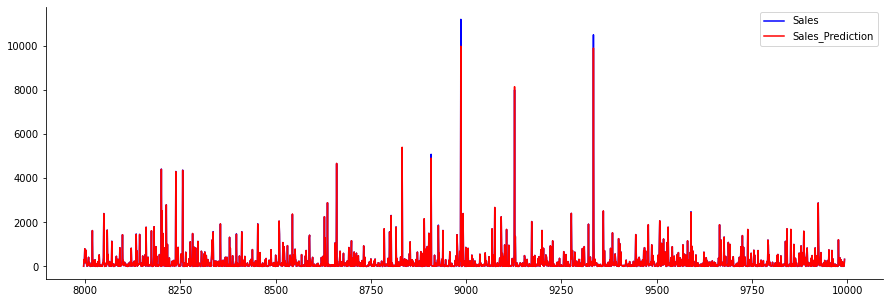

In [36]:
output = df_test[['Sales','Sales_Prediction']].plot(figsize=(15, 5), color=['Blue','Red'], linewidth = 1.5)